# Variables
#### btc: bitcoin dataframe
#### close: bitcoing closing prices stored in a dataframe
#### movAvg: moving Average
#### wma: weighted moving average
#### test_stationarity: function to test stationarity

### Call the function with the cryptocurrency symbol as arguments for the corresponding data

In [5]:
#import warnings
#import iteritools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
def CryptoData(symbol, frequency):
    url = 'https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    print(url)
    df = pd.read_json(url) #Retrieves json data stores it in df
    #Reordering the columns in ohlc form
    df = df[['date', 'open', 'high', 'low', 'close', 'quoteVolume', 'volume', 'weightedAverage']]
    df.set_index('date', inplace=True)
    #Removing high values < opening values. Either method works, df.query doesn't when spaces are present in column names
    #df = df.query('high > open')
    df = df[df.high > df.open]
    df.to_csv(symbol + '.csv') # Store in 'Symbol'.csv - here Ethereum
    
    
    return df



In [9]:
df = CryptoData('USDT_XRP', 86400)
df = pd.read_csv('USDT_XRP.csv')

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&end=9999999999&period=86400&start=0


# Visualisation

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = df.date,
    y = df['close']
)

data = [trace]

py.iplot(data, filename='Bitcoin Closing Prices')

In [11]:
df.set_index("date")

,open,high,low,close,quoteVolume,volume,weightedAverage
date,,,,,,,
2015-03-03,0.002250,0.011400,0.002250,0.002250,2.800903e+04,2.516098e+02,0.008983
2015-03-04,0.009014,0.010140,0.009014,0.009569,1.837424e+02,1.749242e+00,0.009520
2015-03-05,0.011258,0.011500,0.011258,0.011500,2.289619e+03,2.597291e+01,0.011344
2015-04-09,0.003565,0.011500,0.003565,0.011500,8.679999e+00,8.729261e-02,0.010057
2015-04-29,0.005000,0.011389,0.005000,0.011389,1.276576e+00,1.274649e-02,0.009985
2015-05-27,0.006300,0.007000,0.006300,0.007000,9.458400e+02,6.189050e+00,0.006543
2015-05-29,0.009000,0.009000,0.004920,0.004920,1.402334e+03,1.250778e+01,0.008919
2015-06-01,0.007800,0.008600,0.007800,0.007800,6.757868e+02,5.358484e+00,0.007929
2015-06-02,0.007500,0.008576,0.007500,0.008570,8.327898e+02,6.248460e+00,0.007503


In [19]:
df.isnull().sum()

open               0
high               0
low                0
close              0
quoteVolume        0
volume             0
weightedAverage    0
dtype: int64

## The date is not read as a time series object

In [ ]:
#df['DateTime'] = pd.to_datetime(df['DateTime']) #Convert column to datetime 

In [12]:

df['date'] = pd.to_datetime(df['date'])
print("\n Data Types: ")
df.dtypes


 Data Types: 


date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
quoteVolume               float64
volume                    float64
weightedAverage           float64
dtype: object

In [13]:
df.set_index("date", inplace = True)
#Sets the column as the index, without inplace it doesn't seem to take effect.

In [14]:
df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-04-09',
               '2015-04-29', '2015-05-27', '2015-05-29', '2015-06-01',
               '2015-06-02', '2015-06-03',
               ...
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14'],
              dtype='datetime64[ns]', name='date', length=830, freq=None)

In [15]:
close = df['close'] 
close.tail(10)

date
2018-04-05    0.491135
2018-04-06    0.473575
2018-04-07    0.485100
2018-04-08    0.498000
2018-04-09    0.483820
2018-04-10    0.490484
2018-04-11    0.542950
2018-04-12    0.642000
2018-04-13    0.639714
2018-04-14    0.634469
Name: close, dtype: float64

## Getting values using Date Index

In [ ]:
close['2018-03-15']
#close['2018-03-01':'2018-03-15']


## Prices in March 

In [ ]:
close['2018-03']



# Checking Stationarity


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
   
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

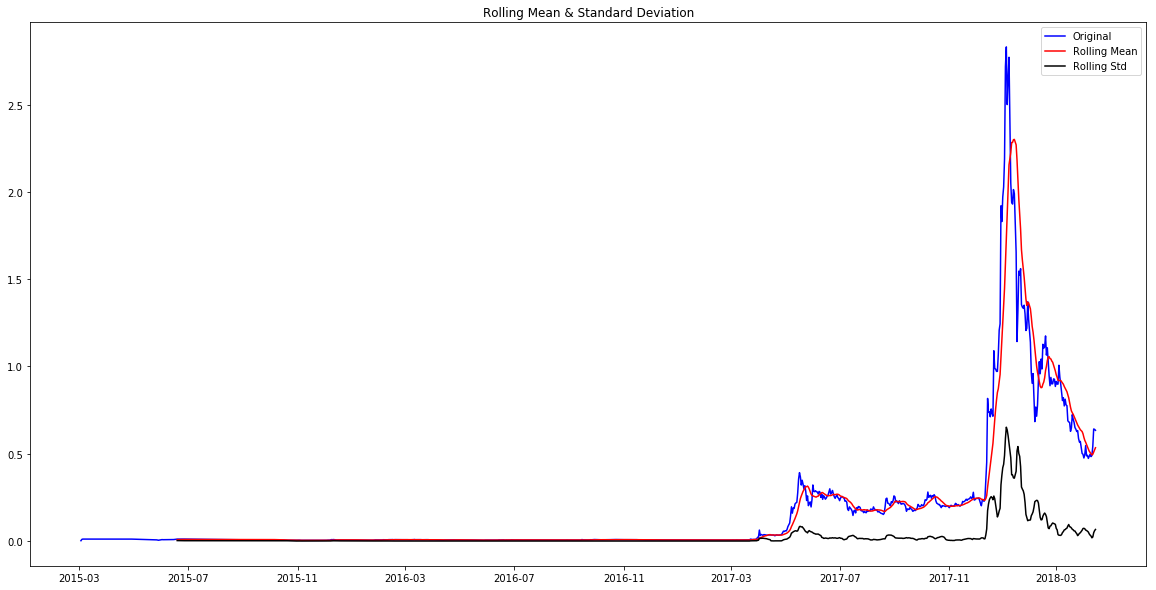

Results of Dickey-Fuller Test:
Test Statistic                  -2.598564
p-value                          0.093294
#Lags Used                      21.000000
Number of Observations Used    808.000000
Critical Value (1%)             -3.438469
Critical Value (5%)             -2.865124
Critical Value (10%)            -2.568678
dtype: float64


In [17]:
test_stationarity(close)

Dickey-Fuller Test for checking stationarity. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 'Test Statistic' is MORE than 'Critical Value'
#### So the series isn't stationary (also since the mean is constantly varying I guess)

# Moving Average

In [ ]:
#movAvg = pd.rolling_mean(close, 12)

movAvg = close.rolling(window=12, center=False).mean()
plt.figure(figsize=(20, 10))
plt.plot(close)
plt.plot(movAvg, color='red')



## Moving Average for 2017-2018 (Below)

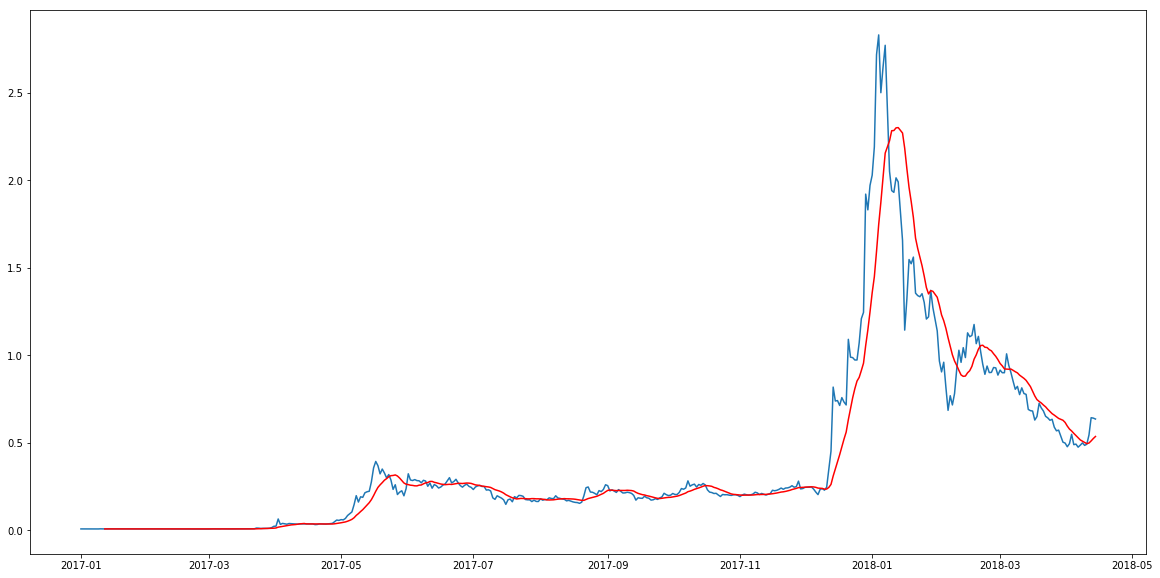

In [18]:
#movAvg = pd.rolling_mean(close, 12)
close = close['2017':'2018']


movAvg = close.rolling(window=12, center=False).mean()
plt.figure(figsize=(20, 10))
plt.plot(close)
plt.plot(movAvg, color='red')



In [19]:
close_movAvg_Diff = close - movAvg
close_movAvg_Diff.head(12)

date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12   -0.000075
Name: close, dtype: float64

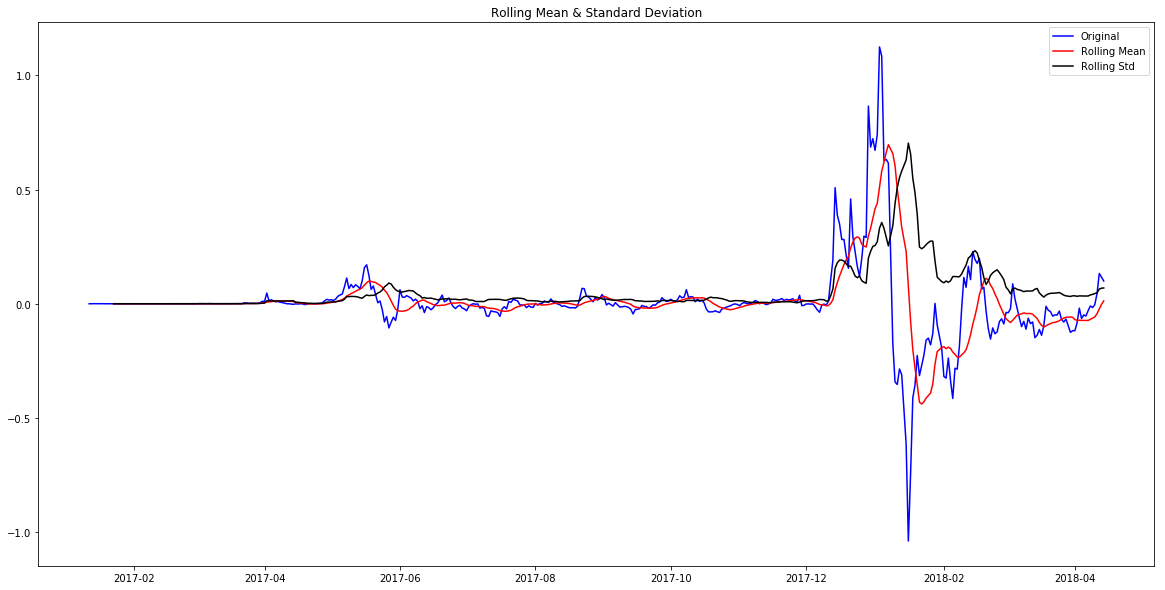

Results of Dickey-Fuller Test:
Test Statistic                  -4.359210
p-value                          0.000350
#Lags Used                      18.000000
Number of Observations Used    430.000000
Critical Value (1%)             -3.445649
Critical Value (5%)             -2.868285
Critical Value (10%)            -2.570363
dtype: float64


In [20]:
close_movAvg_Diff.dropna(inplace=True)
test_stationarity(close_movAvg_Diff)

### 99% confidence that the series is stationary now

# Differencing

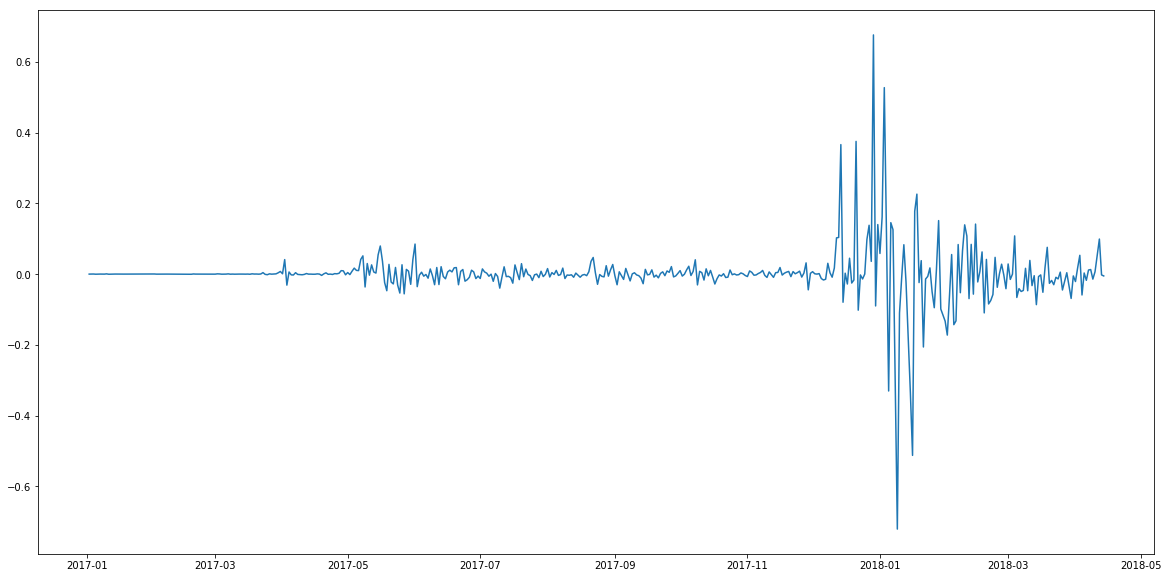

In [21]:
close_diff = close - close.shift(1)
plt.figure(figsize=(20, 10))
plt.plot(close_diff)

#close_diff.to_csv('DifferencedClosePricesETH.csv')

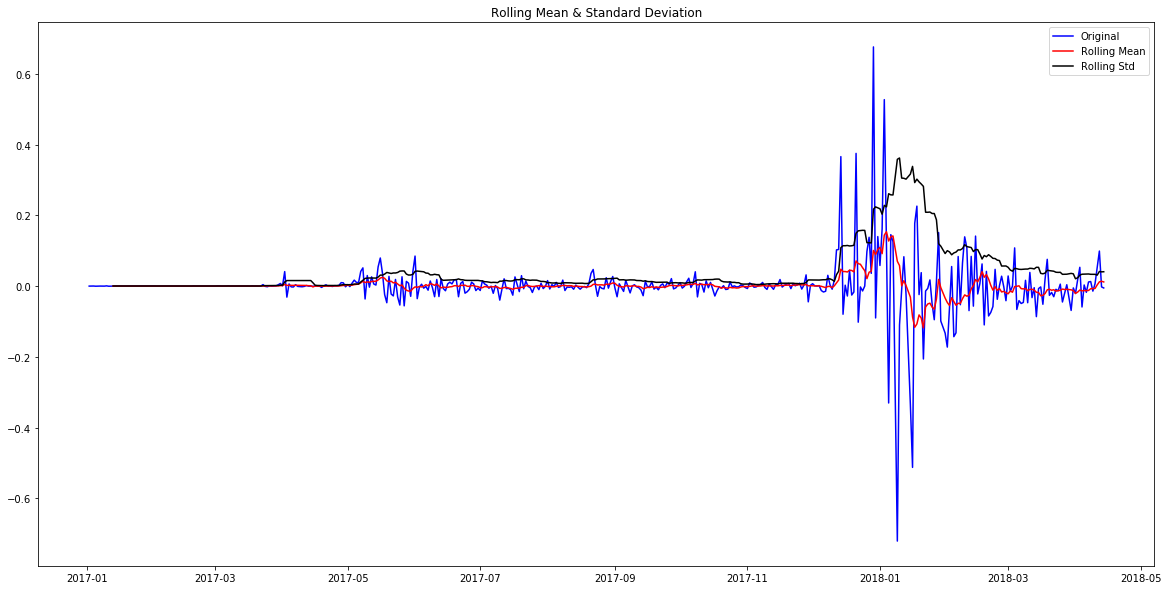

Results of Dickey-Fuller Test:
Test Statistic                  -4.556348
p-value                          0.000155
#Lags Used                      17.000000
Number of Observations Used    441.000000
Critical Value (1%)             -3.445266
Critical Value (5%)             -2.868116
Critical Value (10%)            -2.570273
dtype: float64


In [22]:
close_diff.dropna(inplace=True)
test_stationarity(close_diff)

#### Differencing did the trick!

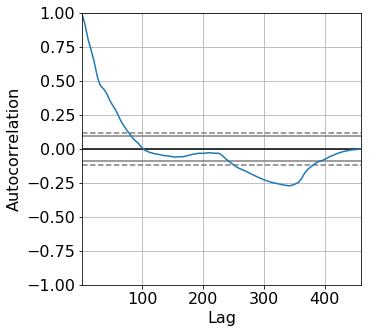

In [39]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(5,5))
autocorrelation_plot(close)
plt.show()

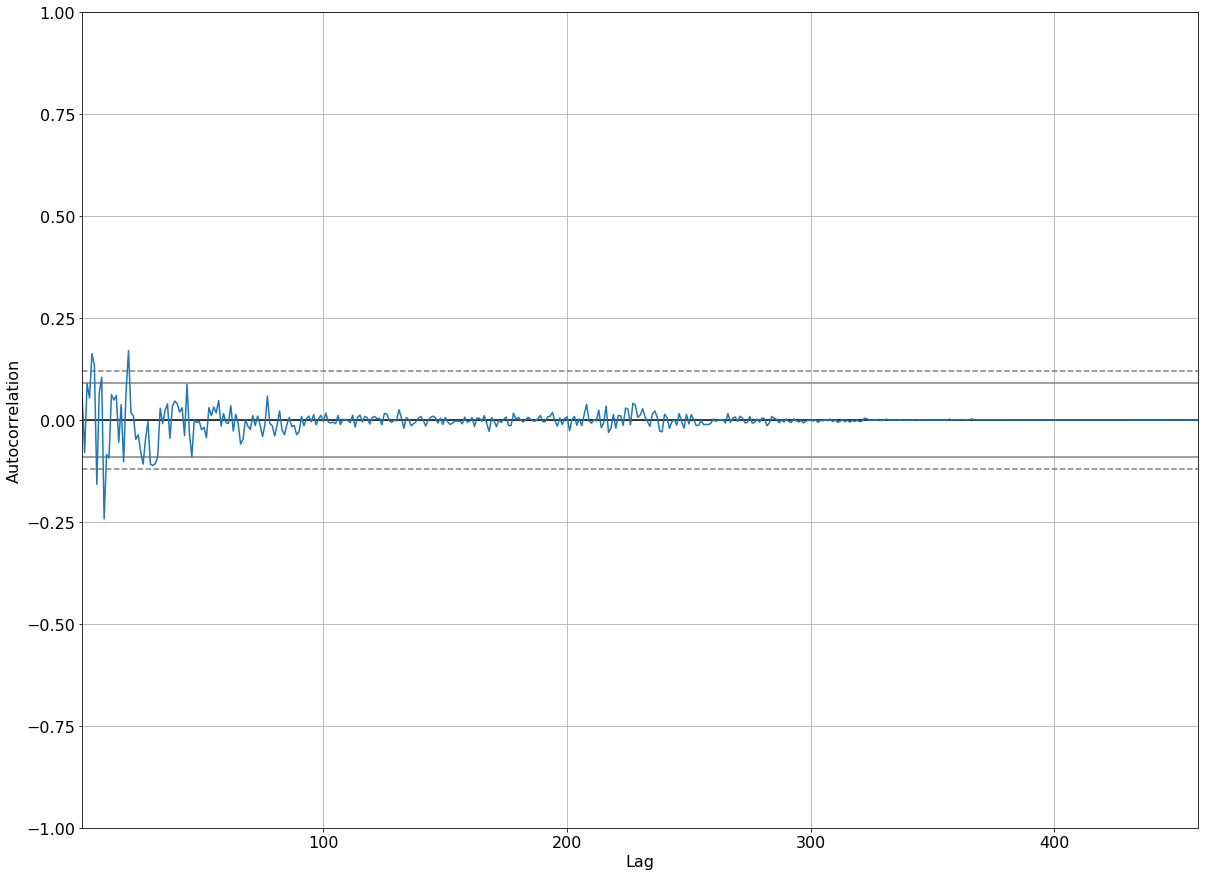

In [41]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20,15))
autocorrelation_plot(close_diff)
plt.show()
#plot_acf(close_diff,alpha=0.5,use_vlines=True, unbiased=True)

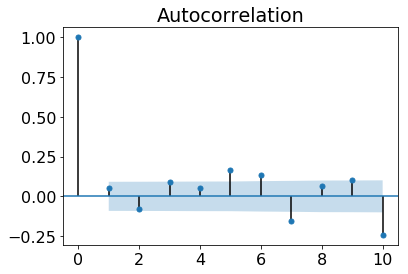

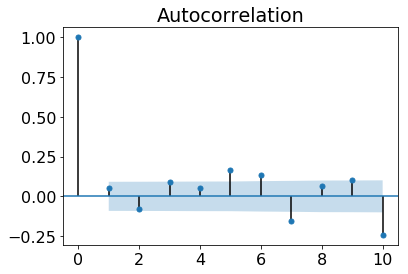

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(close_diff, lags=10)

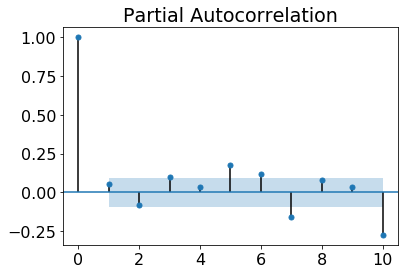

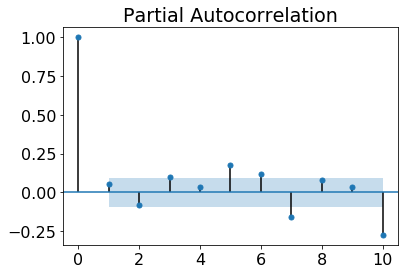

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(close_diff, lags=10)


# Decomposing (You can't use multiplicative model on differenced data because it doesn't take negative values and 0)

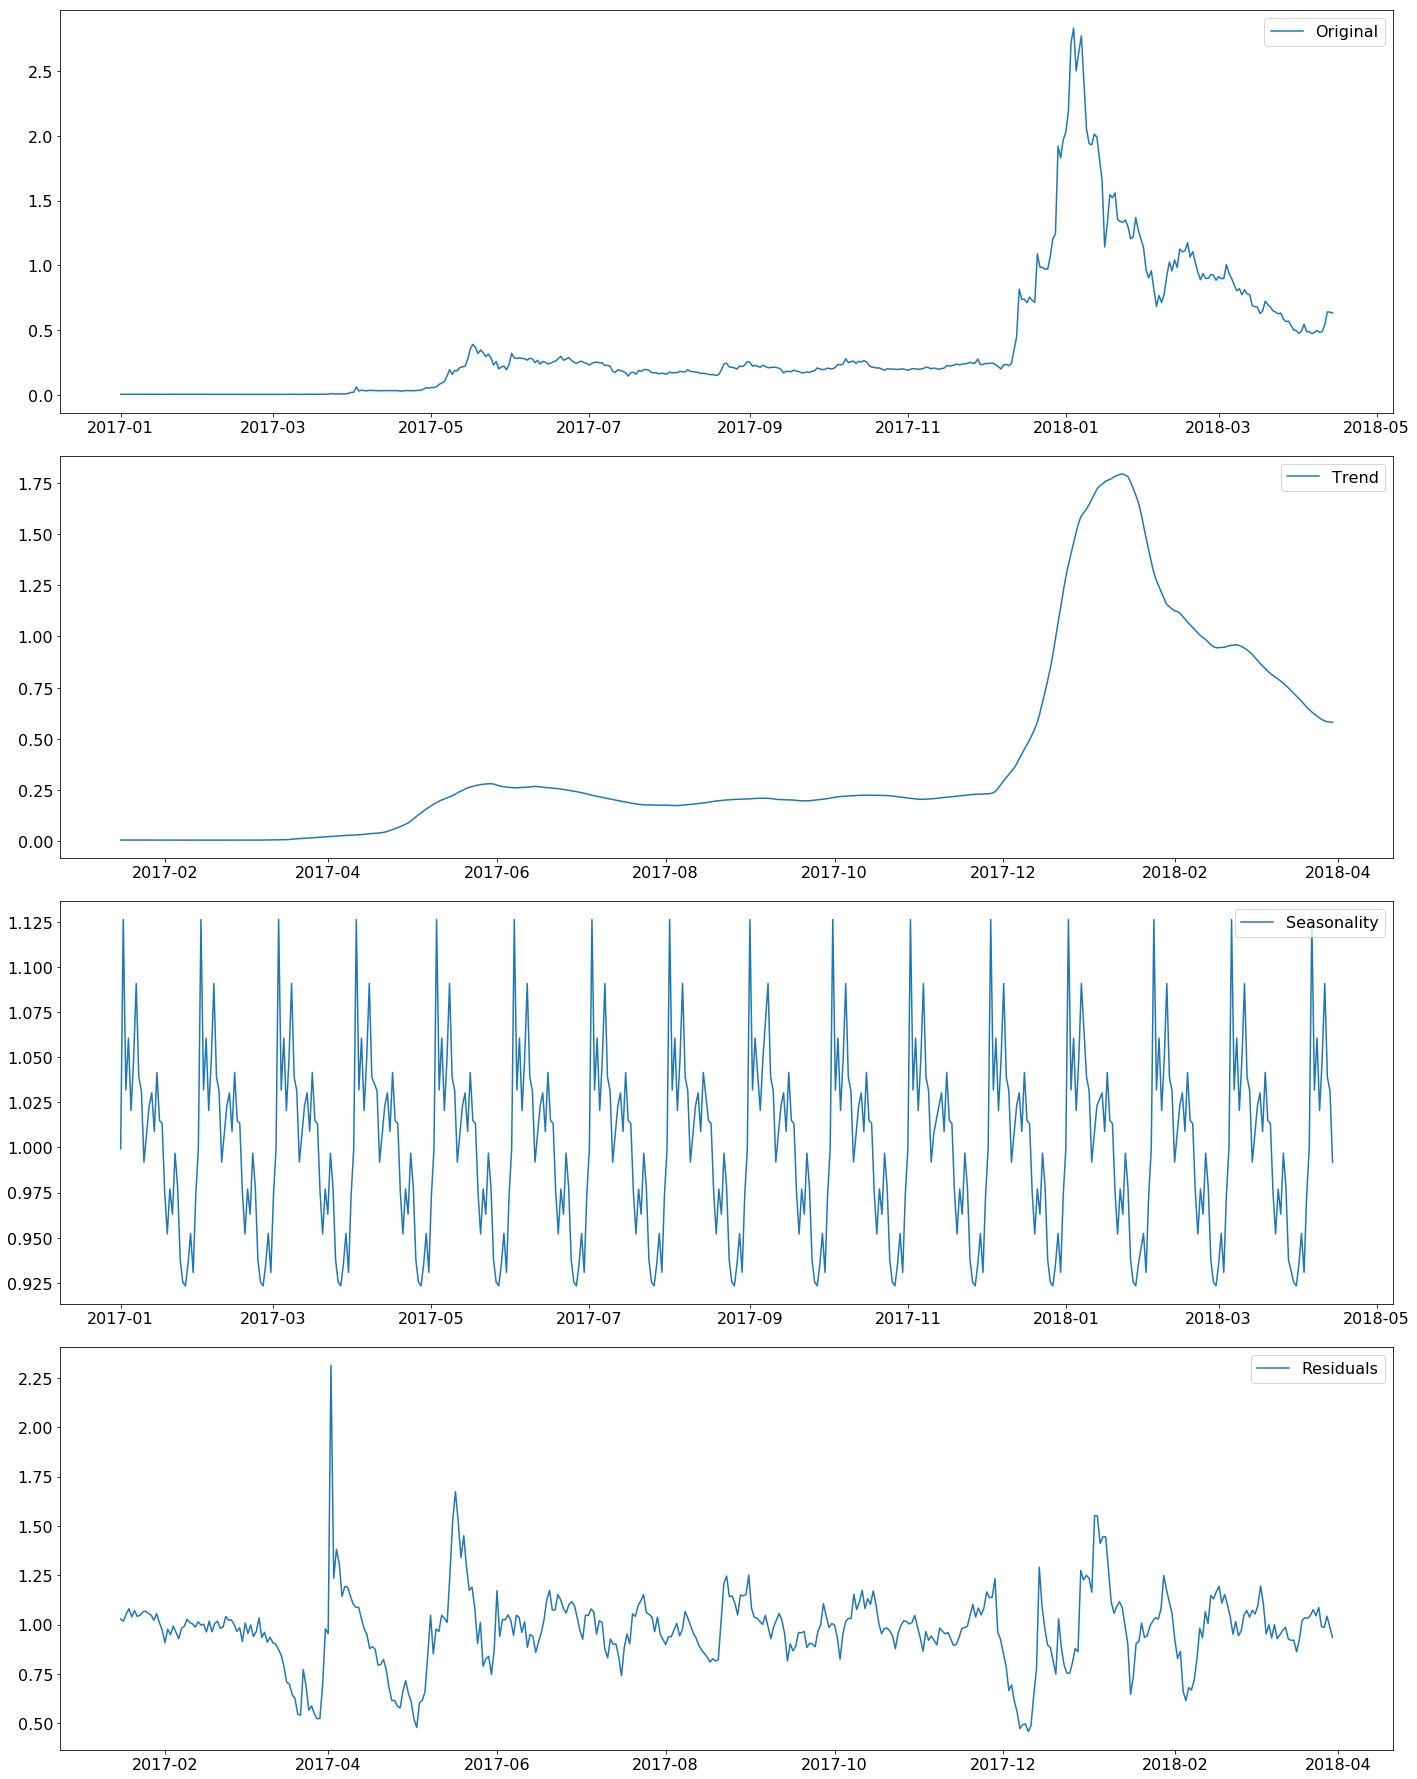

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(close, freq=30, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 25))

plt.subplot(411)
plt.plot(close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

residual.to_csv('ETHMultiplicativeResidual.csv')
#decomposition.to_csv('DecomposedBTC.csv')

# Checking the components for stationarity

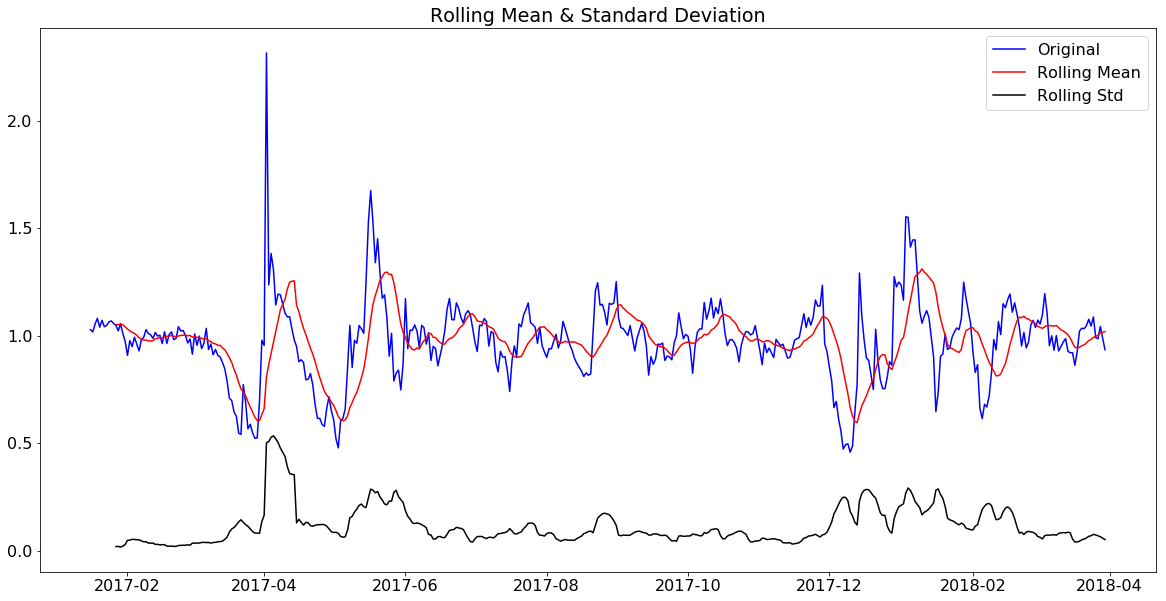

Results of Dickey-Fuller Test:
Test Statistic                -6.386696e+00
p-value                        2.155451e-08
#Lags Used                     3.000000e+00
Number of Observations Used    4.260000e+02
Critical Value (1%)           -3.445794e+00
Critical Value (5%)           -2.868349e+00
Critical Value (10%)          -2.570397e+00
dtype: float64


In [27]:
#replace the residual with "trend" or "seasonal" for checking stationarity on those

close_decompose = residual
close_decompose.dropna(inplace=True)
test_stationarity(close_decompose)

In [ ]:
#replace the residual with "trend" or "seasonal" for checking stationarity on those

close_decompose = seasonal
close_decompose.dropna(inplace=True)
test_stationarity(close_decompose)

### Almost 99% confidence that the series is stationary